In [1]:
import sys
print(sys.version)
%pwd
#git clone https://github.com/fastai/fastai.git
#cd fastai
#conda env update
#conda activate fastai

3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]


'C:\\Users\\chrun\\fastai\\courses\\dl1\\Own\\Deep Learning\\structured data\\Google Analytics Customer Revenue'

In [2]:
!pip install fastai
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.structured import *
from fastai.column_data import *
PATH = 'data/'

C:\Users\chrun\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#!pip install kaggle

#from googleapiclient.discovery import build
#import io, os
#from googleapiclient.http import MediaIoBaseDownload
#from google.colab import auth
#auth.authenticate_user()

#!mkdir -p ~/.kaggle
#!mv kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

#!mkdir data

In [4]:
#!kaggle competitions download -c house-prices-advanced-regression-techniques --force

In [5]:
#!mv sample_submission.csv data
#!mv data_description.txt data
#!mv test.csv data
#!mv train.csv data

In [6]:
#!rm -rf sample_submission.csv.gz
#!rm -rf test.csv.gz
#!rm -rf train.csv.gz

In [7]:
PATH = 'data/'

In [8]:
pd.read_csv(PATH + 'sample_submission.csv').head()

,fullVisitorId,PredictedLogRevenue
0,0000000259678714014,0.0
1,0000049363351866189,0.0
2,0000053049821714864,0.0
3,0000059488412965267,0.0
4,0000085840370633780,0.0


In [9]:
from IPython.display import HTML, display
table_names = ['test', 'train']
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

for t in tables: display(t.head())

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6167871330617112363,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",6167871330617112363_1508151024,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""4"", ""pageviews"": ""4""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508151024,2,1508151024
1,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",0643697640977915618,"{""continent"": ""Europe"", ""subContinent"": ""South...",0643697640977915618_1508175522,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""5"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508175522,1,1508175522
2,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6059383810968229466,"{""continent"": ""Europe"", ""subContinent"": ""Weste...",6059383810968229466_1508143220,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""7"", ""pageviews"": ""7"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508143220,1,1508143220
3,Organic Search,20171016,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",2376720078563423631,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",2376720078563423631_1508193530,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""8"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508193530,1,1508193530
4,Organic Search,20171016,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",2314544520795440038,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",2314544520795440038_1508217442,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""9"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508217442,1,1508217442


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [10]:
test, train = tables

In [11]:
len(train),len(test)

(903653, 804684)

In [12]:
train.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [13]:
train.isna().any()

channelGrouping         False
date                    False
device                  False
fullVisitorId           False
geoNetwork              False
sessionId               False
socialEngagementType    False
totals                  False
trafficSource           False
visitId                 False
visitNumber             False
visitStartTime          False
dtype: bool

In [14]:
train.head().T.head(82)

,0,1,2,3,4
channelGrouping,Organic Search,Organic Search,Organic Search,Organic Search,Organic Search
date,20160902,20160902,20160902,20160902,20160902
device,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...","{""browser"": ""Firefox"", ""browserVersion"": ""not ...","{""browser"": ""Chrome"", ""browserVersion"": ""not a...","{""browser"": ""UC Browser"", ""browserVersion"": ""n...","{""browser"": ""Chrome"", ""browserVersion"": ""not a..."
fullVisitorId,1131660440785968503,377306020877927890,3895546263509774583,4763447161404445595,27294437909732085
geoNetwork,"{""continent"": ""Asia"", ""subContinent"": ""Western...","{""continent"": ""Oceania"", ""subContinent"": ""Aust...","{""continent"": ""Europe"", ""subContinent"": ""South...","{""continent"": ""Asia"", ""subContinent"": ""Southea...","{""continent"": ""Europe"", ""subContinent"": ""North..."
sessionId,1131660440785968503_1472830385,377306020877927890_1472880147,3895546263509774583_1472865386,4763447161404445595_1472881213,27294437909732085_1472822600
socialEngagementType,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged
totals,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",..."
trafficSource,"{""campaign"": ""(not set)"", ""source"": ""google"", ...","{""campaign"": ""(not set)"", ""source"": ""google"", ...","{""campaign"": ""(not set)"", ""source"": ""google"", ...","{""campaign"": ""(not set)"", ""source"": ""google"", ...","{""campaign"": ""(not set)"", ""source"": ""google"", ..."
visitId,1472830385,1472880147,1472865386,1472881213,1472822600


In [15]:
train.totals[0], train.trafficSource[0], train.device[0], train.geoNetwork[0]

('{"visits": "1", "hits": "1", "pageviews": "1", "bounces": "1", "newVisits": "1"}',
 '{"campaign": "(not set)", "source": "google", "medium": "organic", "keyword": "(not provided)", "adwordsClickInfo": {"criteriaParameters": "not available in demo dataset"}}',
 '{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [16]:
from pandas.io.json import json_normalize

In [17]:
#df = train.join(json_normalize(train['totals'].map(json.loads).tolist()).add_prefix('totals.'))\
                                                                        .drop(['totals'], axis=1)

In [18]:
#df = df.join(json_normalize(df['trafficSource'].map(json.loads).tolist()).add_prefix('trafficSource.'))\
                                                                         .drop(['trafficSource'], axis=1)

In [19]:
#df = df.join(json_normalize(df['device'].map(json.loads).tolist()).add_prefix('device.'))\
                                                                  .drop(['device'], axis=1)

In [20]:
#df = df.join(json_normalize(df['geoNetwork'].map(json.loads).tolist()).add_prefix('geoNetwork.'))\
                                                                      .drop(['geoNetwork'], axis=1)

In [ ]:
def load_df(csv_path='/data/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [ ]:
df_small = load_df(nrows=20000)

In [ ]:
df_train = load_df()
df_test = load_df("/data/test.csv")

In [ ]:
df_train.to_csv("train-flattened.csv", index=False)
df_test.to_csv("test-flattened.csv", index=False)

In [21]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,totals.bounces,totals.hits,...,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,1,1,...,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,1,1,...,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,1,1,...,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,1,1,...,not available in demo dataset,Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,Southeast Asia
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,1,1,...,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,Northern Europe


In [22]:
test_df = test.join(json_normalize(test['totals'].map(json.loads).tolist()).add_prefix('totals.'))\
                                                                        .drop(['totals'], axis=1)

In [23]:
test_df = test_df.join(json_normalize(test_df['trafficSource'].map(json.loads).tolist()).add_prefix('trafficSource.'))\
                                                                         .drop(['trafficSource'], axis=1)

In [24]:
test_df = test_df.join(json_normalize(test_df['device'].map(json.loads).tolist()).add_prefix('device.'))\
                                                                  .drop(['device'], axis=1)

In [25]:
test_df = test_df.join(json_normalize(test_df['geoNetwork'].map(json.loads).tolist()).add_prefix('geoNetwork.'))\
                                                                      .drop(['geoNetwork'], axis=1)

In [26]:
len(df), len(test_df)

(903653, 804684)

In [27]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'totals.bounces', 'totals.hits', 'totals.newVisits', 'totals.pageviews',
       'totals.transactionRevenue', 'totals.visits', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.criteriaParameters',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.campaignCode', 'trafficSource.isTrueDirect',
       'trafficSource.keyword', 'trafficSource.medium',
       'trafficSource.referralPath', 'trafficSource.source', 'device.browser',
       'device.browserSize', 'device.browserVersion', 'device.deviceCategory',
       'device.flashVersion', 'device.isMobile', 'device.language',
       'device.mobile

In [28]:
len(df.columns), len(test_df.columns)

(55, 53)

In [29]:
df.nunique()

channelGrouping                                           8
date                                                    366
fullVisitorId                                        714167
sessionId                                            902755
socialEngagementType                                      1
visitId                                              886303
visitNumber                                             384
visitStartTime                                       887159
totals.bounces                                            1
totals.hits                                             274
totals.newVisits                                          1
totals.pageviews                                        213
totals.transactionRevenue                              5332
totals.visits                                             1
trafficSource.adContent                                  44
trafficSource.adwordsClickInfo.adNetworkType              2
trafficSource.adwordsClickInfo.criteriaP

In [30]:
for v in df.columns: 
    if df[v].nunique() <= 1: 
        df.drop(v, axis=1, inplace=True)
        if v in test_df.columns:
            test_df.drop(v, axis=1, inplace=True)

In [31]:
df.nunique(), test_df.nunique()

(channelGrouping                                      8
 date                                               366
 fullVisitorId                                   714167
 sessionId                                       902755
 visitId                                         886303
 visitNumber                                        384
 visitStartTime                                  887159
 totals.hits                                        274
 totals.pageviews                                   213
 totals.transactionRevenue                         5332
 trafficSource.adContent                             44
 trafficSource.adwordsClickInfo.adNetworkType         2
 trafficSource.adwordsClickInfo.gclId             17774
 trafficSource.adwordsClickInfo.page                  8
 trafficSource.adwordsClickInfo.slot                  2
 trafficSource.campaign                              10
 trafficSource.keyword                             3659
 trafficSource.medium                           

In [32]:
len(df.columns), len(test_df.columns)

(31, 30)

In [33]:
df.isna().any()

channelGrouping                                 False
date                                            False
fullVisitorId                                   False
sessionId                                       False
visitId                                         False
visitNumber                                     False
visitStartTime                                  False
totals.hits                                     False
totals.pageviews                                 True
totals.transactionRevenue                        True
trafficSource.adContent                          True
trafficSource.adwordsClickInfo.adNetworkType     True
trafficSource.adwordsClickInfo.gclId             True
trafficSource.adwordsClickInfo.page              True
trafficSource.adwordsClickInfo.slot              True
trafficSource.campaign                          False
trafficSource.keyword                            True
trafficSource.medium                            False
trafficSource.referralPath  

In [34]:
#DataFrameSummary(df).summary()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 31 columns):
channelGrouping                                 903653 non-null object
date                                            903653 non-null int64
fullVisitorId                                   903653 non-null object
sessionId                                       903653 non-null object
visitId                                         903653 non-null int64
visitNumber                                     903653 non-null int64
visitStartTime                                  903653 non-null int64
totals.hits                                     903653 non-null object
totals.pageviews                                903553 non-null object
totals.transactionRevenue                       11515 non-null object
trafficSource.adContent                         10946 non-null object
trafficSource.adwordsClickInfo.adNetworkType    21460 non-null object
trafficSource.adwordsClickInfo.gclId        

In [36]:
df['totals.transactionRevenue'] = df['totals.transactionRevenue'].astype(float)
#df[['totals.transactionRevenue']] = df[['totals.transactionRevenue']].fillna(value=0)
df['totals.transactionRevenue'].min(), df['totals.transactionRevenue'].max()

(10000.0, 23129500000.0)

In [37]:
df['channelGrouping'] = df['channelGrouping'].astype(str) #cat
df['totals.hits'] = df['totals.hits'].astype(float) #cont
df['totals.pageviews'] = df['totals.pageviews'].astype(float) #cont
df['trafficSource.adContent'] = df['trafficSource.adContent'].astype(str) #cat

df['trafficSource.adwordsClickInfo.adNetworkType'] = df['trafficSource.adwordsClickInfo.adNetworkType'].astype(str) #cat
df['trafficSource.adwordsClickInfo.gclId'] = df['trafficSource.adwordsClickInfo.gclId'].astype(str) #cat
df['trafficSource.adwordsClickInfo.page'] = df['trafficSource.adwordsClickInfo.page'].astype(float) #cat
df['trafficSource.adwordsClickInfo.slot'] = df['trafficSource.adwordsClickInfo.slot'].astype(str) #cat
df['trafficSource.campaign'] = df['trafficSource.campaign'].astype(str) #cat
df['trafficSource.keyword'] = df['trafficSource.keyword'].astype(str) #cat
df['trafficSource.medium'] = df['trafficSource.medium'].astype(str) #cat
df['trafficSource.referralPath'] = df['trafficSource.referralPath'].astype(str) #cat
df['trafficSource.medium'] = df['trafficSource.medium'].astype(str) #cat
df['trafficSource.source'] = df['trafficSource.source'].astype(str) #cat

df['device.browser'] = df['device.browser'].astype(str) #cat
df['device.deviceCategory'] = df['device.deviceCategory'].astype(str) #cat
df['device.isMobile'] = df['device.isMobile'].astype(bool) #cat
df['device.operatingSystem'] = df['device.operatingSystem'].astype(str) #cat

df['geoNetwork.city'] = df['geoNetwork.city'].astype(str) #cat
df['geoNetwork.continent'] = df['geoNetwork.continent'].astype(str) #cat
df['geoNetwork.country'] = df['geoNetwork.country'].astype(str) #cat
df['geoNetwork.metro'] = df['geoNetwork.metro'].astype(str) #cat
df['geoNetwork.networkDomain'] = df['geoNetwork.networkDomain'].astype(str) #cat
df['geoNetwork.region'] = df['geoNetwork.region'].astype(str) #cat
df['geoNetwork.subContinent'] = df['geoNetwork.subContinent'].astype(str) #cat

df['fullVisitorId'] = df['fullVisitorId'].astype(str) #cat
df['visitId'] = df['visitId'].astype(str) #cat

In [38]:
test_df['totals.transactionRevenue'] = 0
test_df['totals.transactionRevenue'] = test_df['totals.transactionRevenue'].astype(float)
test_df['channelGrouping'] = test_df['channelGrouping'].astype(str) #cat
test_df['totals.hits'] = test_df['totals.hits'].astype(float) #cont
test_df['totals.pageviews'] = test_df['totals.pageviews'].astype(float) #cont
test_df['trafficSource.adContent'] = test_df['trafficSource.adContent'].astype(str) #cat

test_df['trafficSource.adwordsClickInfo.adNetworkType'] = test_df['trafficSource.adwordsClickInfo.adNetworkType'].astype(str) #cat
test_df['trafficSource.adwordsClickInfo.gclId'] = test_df['trafficSource.adwordsClickInfo.gclId'].astype(str) #cat
test_df['trafficSource.adwordsClickInfo.page'] = test_df['trafficSource.adwordsClickInfo.page'].astype(float) #cat
test_df['trafficSource.adwordsClickInfo.slot'] = test_df['trafficSource.adwordsClickInfo.slot'].astype(str) #cat
test_df['trafficSource.campaign'] = test_df['trafficSource.campaign'].astype(str) #cat
test_df['trafficSource.keyword'] = test_df['trafficSource.keyword'].astype(str) #cat
test_df['trafficSource.medium'] = test_df['trafficSource.medium'].astype(str) #cat
test_df['trafficSource.referralPath'] = test_df['trafficSource.referralPath'].astype(str) #cat
test_df['trafficSource.medium'] = test_df['trafficSource.medium'].astype(str) #cat
test_df['trafficSource.source'] = test_df['trafficSource.source'].astype(str) #cat

test_df['device.browser'] = test_df['device.browser'].astype(str) #cat
test_df['device.deviceCategory'] = test_df['device.deviceCategory'].astype(str) #cat
test_df['device.isMobile'] = test_df['device.isMobile'].astype(bool) #cat
test_df['device.operatingSystem'] = test_df['device.operatingSystem'].astype(str) #cat

test_df['geoNetwork.city'] = test_df['geoNetwork.city'].astype(str) #cat
test_df['geoNetwork.continent'] = test_df['geoNetwork.continent'].astype(str) #cat
test_df['geoNetwork.country'] = test_df['geoNetwork.country'].astype(str) #cat
test_df['geoNetwork.metro'] = test_df['geoNetwork.metro'].astype(str) #cat
test_df['geoNetwork.networkDomain'] = test_df['geoNetwork.networkDomain'].astype(str) #cat
test_df['geoNetwork.region'] = test_df['geoNetwork.region'].astype(str) #cat
test_df['geoNetwork.subContinent'] = test_df['geoNetwork.subContinent'].astype(str) #cat

test_df['fullVisitorId'] = test_df['fullVisitorId'].astype(str) #cat
test_df['visitId'] = test_df['visitId'].astype(str) #cat

In [39]:
# checked datatype of each column and if it's categorical
#df['geoNetwork.subContinent'].unique() 

In [40]:
df['date'] = pd.to_datetime(train['date'], format="%Y%m%d")
test_df['date'] = pd.to_datetime(train['date'], format="%Y%m%d")

In [41]:
df['date'].head(), test_df['date'].head()

(0   2016-09-02
 1   2016-09-02
 2   2016-09-02
 3   2016-09-02
 4   2016-09-02
 Name: date, dtype: datetime64[ns], 0   2016-09-02
 1   2016-09-02
 2   2016-09-02
 3   2016-09-02
 4   2016-09-02
 Name: date, dtype: datetime64[ns])

In [42]:
add_datepart(df, "date", drop=False)
add_datepart(test_df, "date", drop=False)

In [43]:
len(df.columns), len(test_df.columns)

(44, 44)

In [44]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'totals.hits', 'totals.pageviews',
       'totals.transactionRevenue', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.keyword', 'trafficSource.medium',
       'trafficSource.referralPath', 'trafficSource.source', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'Year', 'Month', 'Week', 'Day', 'Dayofweek',
       'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start

In [45]:
test_df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'totals.hits', 'totals.pageviews',
       'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.keyword', 'trafficSource.medium',
       'trafficSource.referralPath', 'trafficSource.source', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.transactionRevenue', 'Year', 'Month',
       'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end',
       'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end',
       'Is_yea

In [46]:
#pd.set_option('display.max_columns', 500)
#DataFrameSummary(df).summary()

In [47]:
cat_vars = ['channelGrouping', #'sessionId', 'visitId', 'fullVisitorId',
            'trafficSource.adwordsClickInfo.adNetworkType',
            'trafficSource.adwordsClickInfo.gclId', 
            'trafficSource.adwordsClickInfo.page', 'trafficSource.adContent', 
            'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
            'trafficSource.keyword', 'trafficSource.medium',
            'trafficSource.referralPath', 'trafficSource.source', 'device.browser',
            'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
            'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
            'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
            'geoNetwork.subContinent']

contin_vars = ['visitNumber', 'visitStartTime', 'totals.hits', 'totals.pageviews']



In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804684 entries, 0 to 804683
Data columns (total 44 columns):
channelGrouping                                 804684 non-null object
date                                            804684 non-null datetime64[ns]
fullVisitorId                                   804684 non-null object
sessionId                                       804684 non-null object
visitId                                         804684 non-null object
visitNumber                                     804684 non-null int64
visitStartTime                                  804684 non-null int64
totals.hits                                     804684 non-null float64
totals.pageviews                                804545 non-null float64
trafficSource.adContent                         804684 non-null object
trafficSource.adwordsClickInfo.adNetworkType    804684 non-null object
trafficSource.adwordsClickInfo.gclId            804684 non-null object
trafficSource.adwordsClickInf

In [49]:
dep = 'totals.transactionRevenue'
test_df[dep] = 0
test_df['id'] = str(test_df['fullVisitorId']) + str(test_df['visitId'])

In [50]:
train_df = df[cat_vars + contin_vars + [dep, 'date']].copy()

In [51]:

test_df = test_df[cat_vars + contin_vars + [dep, 'date', 'id']].copy()
#id = 'fullVisitorId'+'visitId' : unique identifier, column has to be created

In [52]:
train_df.head()

,channelGrouping,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adContent,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,...,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,visitNumber,visitStartTime,totals.hits,totals.pageviews,totals.transactionRevenue,date
0,Organic Search,nan,nan,NaN,nan,nan,(not set),(not provided),organic,nan,...,(not set),ttnet.com.tr,Izmir,Western Asia,1,1472830385,1.0,1.0,NaN,2016-09-02
1,Organic Search,nan,nan,NaN,nan,nan,(not set),(not provided),organic,nan,...,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1,1472880147,1.0,1.0,NaN,2016-09-02
2,Organic Search,nan,nan,NaN,nan,nan,(not set),(not provided),organic,nan,...,(not set),unknown.unknown,Community of Madrid,Southern Europe,1,1472865386,1.0,1.0,NaN,2016-09-02
3,Organic Search,nan,nan,NaN,nan,nan,(not set),google + online,organic,nan,...,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1,1472881213,1.0,1.0,NaN,2016-09-02
4,Organic Search,nan,nan,NaN,nan,nan,(not set),(not provided),organic,nan,...,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,2,1472822600,1.0,1.0,NaN,2016-09-02


In [53]:
test_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False, False, False, False, False,
       False])

In [54]:
train_df.to_pickle("train_df")
test_df.to_pickle("test_df")

In [55]:
train_df = pd.read_pickle("train_df")
test_df = pd.read_pickle("test_df")

In [56]:
len(test_df)

804684

In [57]:
train_df = train_df.sort_values(by='date') 
test_df = test_df.sort_values(by='date')

In [58]:
dep = 'totals.transactionRevenue'
n = len(train_df); n

903653

In [59]:
#for v in cat_vars: train_df[v] = train_df[v].fillna(-999).astype('category').cat.as_ordered()
#for v in cat_vars: test_df[v] = test_df[v].fillna(-999).astype('category').cat.as_ordered()

for v in cat_vars: train_df[v] = train_df[v].astype('category').cat.as_ordered()

In [60]:
apply_cats(test_df, train_df)

In [61]:
!pip install scikit-learn
from sklearn.preprocessing import Imputer

In [62]:
for v in contin_vars:
    train_df[v] = train_df[v].astype('float32')
    test_df[v] = test_df[v].astype('float32')
    
#imputer = Imputer()
#values = train_df[contin_vars].values
#train_df[contin_vars] = imputer.fit_transform(train_df[contin_vars])
#values = test_df[contin_vars].values
#test_df[contin_vars] = imputer.fit_transform(test_df[contin_vars])

    
train_df[dep] = train_df[dep].astype('float32')
test_df[dep] = test_df[dep].astype('float32')

In [63]:
#idxs = get_cv_idxs(n, val_pct=150000/n)
#train_indexed = train_df.iloc[idxs].set_index("date")
#samp_size = len(train_indexed); samp_size

train_indexed = train_df.set_index("date")
samp_size = len(train_indexed); samp_size

903653

In [64]:
train_indexed['totals.transactionRevenue'] = train_indexed['totals.transactionRevenue'].fillna(0)

In [65]:
df, y, nas, mapper = proc_df(train_indexed, 'totals.transactionRevenue', do_scale=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 903653 entries, 2016-08-01 to 2017-08-01
Data columns (total 27 columns):
channelGrouping                                 903653 non-null int8
trafficSource.adwordsClickInfo.adNetworkType    903653 non-null int8
trafficSource.adwordsClickInfo.gclId            903653 non-null int16
trafficSource.adwordsClickInfo.page             903653 non-null int8
trafficSource.adContent                         903653 non-null int8
trafficSource.adwordsClickInfo.slot             903653 non-null int8
trafficSource.campaign                          903653 non-null int8
trafficSource.keyword                           903653 non-null int16
trafficSource.medium                            903653 non-null int8
trafficSource.referralPath                      903653 non-null int16
trafficSource.source                            903653 non-null int16
device.browser                                  903653 non-null int8
device.deviceCategory                    

In [67]:
test_indexed = test_df.set_index("date")

In [68]:
df_test, _, nas, mapper = proc_df(test_indexed, 'totals.transactionRevenue', do_scale=True, 
                                  skip_flds=['id'], mapper=mapper, na_dict=nas)

In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 804684 entries, 2016-08-01 to 2017-08-01
Data columns (total 27 columns):
channelGrouping                                 804684 non-null int8
trafficSource.adwordsClickInfo.adNetworkType    804684 non-null int8
trafficSource.adwordsClickInfo.gclId            804684 non-null int16
trafficSource.adwordsClickInfo.page             804684 non-null int8
trafficSource.adContent                         804684 non-null int8
trafficSource.adwordsClickInfo.slot             804684 non-null int8
trafficSource.campaign                          804684 non-null int8
trafficSource.keyword                           804684 non-null int16
trafficSource.medium                            804684 non-null int8
trafficSource.referralPath                      804684 non-null int16
trafficSource.source                            804684 non-null int16
device.browser                                  804684 non-null int8
device.deviceCategory                    

In [70]:
df_test

,channelGrouping,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adContent,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,...,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,visitNumber,visitStartTime,totals.hits,totals.pageviews,totals.pageviews_na
date,,,,,,,,,,,,,,,,,,,,,
2016-08-01,5,3,17775,0,32,3,1,12,6,1476,...,213,48,2021,58,13,-0.136249,3.060674,0.145566,-0.120919,-0.01052
2016-08-01,3,3,17775,0,32,3,1,2258,1,1476,...,33,94,25842,376,21,-0.136249,3.061894,-0.269310,-0.405619,-0.01052
2016-08-01,5,3,17775,0,32,3,1,12,6,1476,...,213,79,1,58,13,-0.136249,3.058957,-0.269310,-0.263269,-0.01052
2016-08-01,5,3,17775,0,32,3,1,12,6,1476,...,213,94,25842,376,13,-0.136249,3.056531,-0.269310,-0.405619,-0.01052
2016-08-01,8,3,17775,0,32,3,1,2258,7,1,...,213,94,19829,376,13,-0.136249,3.060107,-0.269310,-0.263269,-0.01052
2016-08-01,5,3,17775,0,32,3,1,12,6,1476,...,94,1,884,327,19,-0.136249,3.056375,-0.269310,-0.263269,-0.01052
2016-08-01,5,3,17775,0,32,3,1,12,6,1476,...,213,79,21095,58,13,-0.136249,3.061454,-0.269310,-0.263269,-0.01052
2016-08-01,5,3,17775,0,32,3,1,12,6,1476,...,124,1,1,107,17,-0.136249,3.055354,-0.269310,-0.263269,-0.01052
2016-08-01,5,3,17775,0,32,3,1,12,6,1476,...,213,79,1,58,13,-0.136249,3.057709,-0.269310,-0.263269,-0.01052


In [71]:
df.head()

,channelGrouping,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adContent,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,...,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,visitNumber,visitStartTime,totals.hits,totals.pageviews,totals.pageviews_na
date,,,,,,,,,,,,,,,,,,,,,
2016-08-01,3,3,17775,0,32,3,1,2258,1,1476,...,103,94,10956,376,7,-0.136249,-1.658509,-0.373029,-0.405619,-0.01052
2016-08-01,3,3,17775,0,32,3,1,2258,1,1476,...,218,1,25842,130,17,0.079182,-1.658495,-0.373029,-0.405619,-0.01052
2016-08-01,7,3,17775,0,32,3,1,2258,7,1,...,213,79,1,58,13,-0.136249,-1.652933,-0.373029,-0.405619,-0.01052
2016-08-01,3,3,17775,0,32,3,1,2258,1,1476,...,29,94,3306,376,16,-0.136249,-1.654621,-0.373029,-0.405619,-0.01052
2016-08-01,3,3,17775,0,32,3,1,2258,1,1476,...,200,94,25842,376,17,-0.136249,-1.651103,-0.373029,-0.405619,-0.01052


In [72]:
train_ratio = 0.5
train_size = int(samp_size * train_ratio)
val_idx = list(range(train_size, len(df))); len(val_idx)

451827

In [73]:
samp_size = n

In [74]:
from sklearn.metrics import mean_squared_error

def exp_rmse(y_pred, targ):
    return math.sqrt(mean_squared_error(targ, y_pred))

In [75]:
yp = y + 1
#yp[yp == 0] = 1e-5

In [76]:
yl = np.log(yp)

In [77]:
len(np.unique(y))

5333

In [78]:
yl

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [79]:
max_y = np.max(yl)

In [80]:
y_range = (0, max_y*1.2)

In [81]:
len(val_idx), len(yl)

(451827, 903653)

In [82]:
yp

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [83]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl, cat_flds=cat_vars, bs=256,
                                       test_df=df_test)

In [84]:
cat_sz = [(c, len(train_df[c].cat.categories)+1) for c in cat_vars]

In [85]:
cat_sz

[('channelGrouping', 9),
 ('trafficSource.adwordsClickInfo.adNetworkType', 4),
 ('trafficSource.adwordsClickInfo.gclId', 17776),
 ('trafficSource.adwordsClickInfo.page', 9),
 ('trafficSource.adContent', 46),
 ('trafficSource.adwordsClickInfo.slot', 4),
 ('trafficSource.campaign', 11),
 ('trafficSource.keyword', 3661),
 ('trafficSource.medium', 8),
 ('trafficSource.referralPath', 1477),
 ('trafficSource.source', 381),
 ('device.browser', 55),
 ('device.deviceCategory', 4),
 ('device.isMobile', 3),
 ('device.operatingSystem', 21),
 ('geoNetwork.city', 650),
 ('geoNetwork.continent', 7),
 ('geoNetwork.country', 223),
 ('geoNetwork.metro', 95),
 ('geoNetwork.networkDomain', 28065),
 ('geoNetwork.region', 377),
 ('geoNetwork.subContinent', 24)]

In [86]:
emb_szs = [(c, max(10, min(60, (c+1)//2))) for _,c in cat_sz]

In [87]:
emb_szs

[(9, 10),
 (4, 10),
 (17776, 60),
 (9, 10),
 (46, 23),
 (4, 10),
 (11, 10),
 (3661, 60),
 (8, 10),
 (1477, 60),
 (381, 60),
 (55, 28),
 (4, 10),
 (3, 10),
 (21, 11),
 (650, 60),
 (7, 10),
 (223, 60),
 (95, 48),
 (28065, 60),
 (377, 60),
 (24, 12)]

In [88]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)

In [89]:
m.lr_find()

epoch      trn_loss   val_loss                                                                                         
    0      3.730822   4.348133  



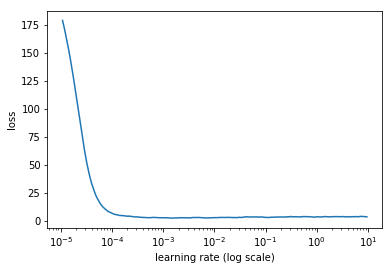

In [90]:
m.sched.plot()

In [91]:
lr = 10**-4#.6 

In [92]:
lr

0.0001

In [93]:
m.fit(lr, 1, cycle_len = 3, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      2.653815   3.03573    1.217787  
    1      2.441462   2.920066   1.195804                                                                              
    2      2.861866   2.927748   1.193123                                                                              



[array([2.92775]), 1.1931229579286584]

In [94]:
m.save("customer_revenue_3e")

In [95]:
m.load("customer_revenue_3e")

In [96]:
m.fit(lr, 3, cycle_len = 1, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      2.664808   2.887631   1.173322  
    1      2.422718   2.886497   1.164881                                                                              
    2      2.516791   2.864977   1.155995                                                                              



[array([2.86498]), 1.1559952919839735]

In [97]:
m.save("customer_revenue_6e")

In [98]:
m.load("customer_revenue_6e")

In [99]:
m.fit(lr, 3, cycle_len = 2, cycle_mult = 2, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      2.545473   2.951954   1.175329  
    1      2.341655   2.87894    1.153744                                                                              
    2      2.314197   2.901068   1.147984                                                                              
    3      2.397694   2.93092    1.155399                                                                              
    4      2.176279   2.886239   1.144321                                                                              
    5      2.209363   2.892434   1.146964                                                                              
    6      2.47133    2.873071   1.141928                                                                              
    7      2.532988   3.151078   1.205886                                                                           

[array([2.97446]), 1.1555909311334447]

In [100]:
m.save("customer_revenue_6e_14ER")

In [ ]:
m.fit(lr, 4, cycle_len = 2, cycle_mult = 2, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      2.101161   3.010772   1.157019  
    1      2.10842    3.019073   1.161042                                                                              
    2      2.249652   3.146132   1.177126                                                                              
    3      2.120944   3.038411   1.166428                                                                              
    4      2.08011    3.046646   1.168741                                                                              
    5      2.217517   3.048603   1.167605                                                                              
    6      2.164671   3.087208   1.174972                                                                              
    7      2.337268   3.13466    1.183187                                                                           

In [ ]:
m.save("customer_revenue_6e_14ER_28ER")

# Test Set

In [ ]:
x,y=m.predict_with_targs()
x = torch.from_numpy(x)
y = torch.from_numpy(y)
exp_rmse(x,y)

#pred_test=m.predict(True)

In [ ]:
log_preds = m.predict(True)

In [ ]:
log_preds

In [ ]:
log_test = np.exp(log_preds) -1

In [ ]:
log_test

In [ ]:
test['PredictedLogRevenue'] = log_test

In [ ]:
test.head()

In [ ]:
csv_fn=f'{PATH}submission.csv'

test[['fullVisitorId','PredictedLogRevenue']].to_csv(csv_fn, index=False)

In [ ]:
test[['fullVisitorId','PredictedLogRevenue']]